In [10]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
%matplotlib inline

In [11]:
diabetes_df = pd.read_csv("Data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabetes_df.isnull().sum().sum()

0

In [14]:
y = diabetes_df["Outcome"]  # Dependent variable
X = diabetes_df.drop(columns=["Outcome"])  # Independent variables

In [15]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Multicollinearity

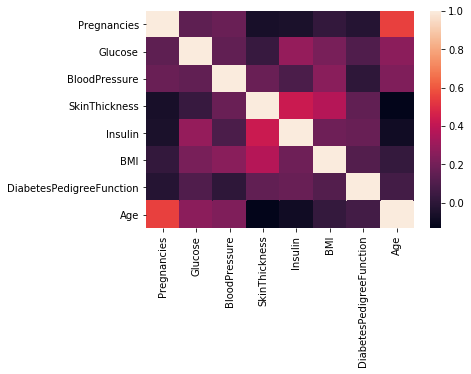

In [16]:
# calculate the correlation matrix
corr = X_train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

## AdaBoost

In [17]:
# Instantiation a AdaBoost classifier because target is a classification
abc = AdaBoostClassifier()

# Fitting the model
abc.fit(X_train, y_train)

abc.score(X_train, y_train)  # 83% 

0.8420195439739414

In [18]:
cross_val_score(abc, X_train, y_train, cv=5)

array([0.7398374 , 0.75609756, 0.72357724, 0.73170732, 0.78688525])

In [23]:
precision_score(y_train, abc.predict(X_train))

0.8

In [24]:
recall_score(y_train, abc.predict(X_train))

0.7373271889400922

## Gradient Boost

In [19]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

gbc.score(X_train, y_train)  # 92.5%

0.9283387622149837

In [20]:
cross_val_score(gbc, X_train, y_train, cv=5)

array([0.77235772, 0.76422764, 0.76422764, 0.73170732, 0.80327869])

In [21]:
precision_score(y_train, gbc.predict(X_train))

0.9219512195121952

In [22]:
recall_score(y_train, gbc.predict(X_train))

0.8709677419354839

# Conclusion
Gradient boost has better results